# CSE 330 Numerical Analysis Lab 

### Lab 6: Polynomial Root Finding

### Instructions
---

In this week's assignment we will try to find out roots of a polynomial.
1. Finding root via binomial method.
2. Finding root via Fixed point (Newton method).

### `pandas` Dataframe:
Before we start we will know a little about `pandas` dataframe. `pandas` is a python library. Dataframes are classes that are used to store complex data. You can initialize one as a python dictionary. Let's take a look. 

In [0]:
import pandas as pd

x = [0, 1, 2, 3, 4, 5, 6, 7]
y = [1.0, 5.2, 3.9, 8.4, 14.6, 12.3, 8.9, 10.2]

dictionary = {
    "x": x,
    "y": y,
}
df = pd.DataFrame(dictionary)
print(df)

   x     y
0  0   1.0
1  1   5.2
2  2   3.9
3  3   8.4
4  4  14.6
5  5  12.3
6  6   8.9
7  7  10.2


We can use it to print data in a tabular format. We can even use more `numpy` arrays with it.

In [0]:
import numpy as np

x = np.linspace(0, np.pi/2, 15)
y = np.sin(x)

dictionary = {
    "x": x,
    "sin(x)": y,
}
df = pd.DataFrame(dictionary)
print(df)

           x    sin(x)
0   0.000000  0.000000
1   0.112200  0.111964
2   0.224399  0.222521
3   0.336599  0.330279
4   0.448799  0.433884
5   0.560999  0.532032
6   0.673198  0.623490
7   0.785398  0.707107
8   0.897598  0.781831
9   1.009798  0.846724
10  1.121997  0.900969
11  1.234197  0.943883
12  1.346397  0.974928
13  1.458597  0.993712
14  1.570796  1.000000


### Root Finding:
Let $f(x)$ be a function of $x$. if for some $x=\alpha, f(x) = f(\alpha) = 0$, we say $\alpha$ is a root of function $x$.

Let, 
$$f(x) = x^5 + 2.5x^4 - 2x^3 -6x^2 + x + 2\tag{6.1}$$

The graph of $f(x)$ looks like this.

[-2.         -1.92076271 -0.5819979   0.67242436  1.33033625]


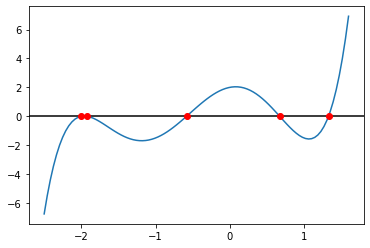

In [0]:
from numpy.polynomial import Polynomial
import matplotlib.pyplot as plt

f = Polynomial([2.0, 1.0, -6.0, -2.0, 2.5, 1.0])
x = np.linspace(-2.5, 1.6, 100)
y = f(x)
dictionary = {
    'x': x,
    'y': y
}
plt.axhline(y=0, color='k')
plt.plot(x, y)
plt.plot(f.roots(), [0.0]*5, 'ro')
print(f.roots())

Roots are the points where the graph intersects with the $X$-axis.

### Bisection

One way to find out root's are to use bisection method. Here is the strategy, if $\alpha$ is a root between and interval $[a, b]$ then graph will cross the $X$-axis at $\alpha$. So, $sign( f(\alpha-h) ) = - sign( f(\alpha+h) )$, for small value of $h$. 

So, we can work our way up towards the root by taking average of $a$ and $b$, as long as the signs are different.

we will start with $a_0$ and $b_0$, such that, $f(a_0) f(b_0) < 0$.
Then we iterate as this,
\begin{align}
m_k &= \frac{a_k + b_k}{2} \\
\text{if, } f(a_k) f(m_k) < 0, \text{ then, } a_{k+1} &= a_k \text{ and } b_{k+1} = m_k\\
\text{else, } a_{k+1} &= m_k \text{ and, } b_{k+1} = b_k
\end{align}

We keep iterating until we find the root with sufficient precision. We usually use a formula like this,
$$
\frac{|m_{k+1} - m_k|}{|m_{k+1}|} \leq \epsilon \\  
$$
Where, $\epsilon$ is a very small value, like $\epsilon < 10^{-6}$

### A. Complete the code below
Complete the code below to iterate and solve for a root of $Eq. 6.1$, between the interval, $[-0.5, 1.3]$.

           a         b         m      f(x)
0  -0.500000  1.300000  0.400000  1.386240
1   0.400000  1.300000  0.400000  1.386240
2   0.400000  0.850000  0.850000 -0.964529
3   0.625000  0.850000  0.625000  0.269806
4   0.625000  0.737500  0.737500 -0.370437
5   0.625000  0.681250  0.681250 -0.050487
6   0.653125  0.681250  0.653125  0.110236
7   0.667188  0.681250  0.667188  0.029945
8   0.667188  0.674219  0.674219 -0.010263
9   0.670703  0.674219  0.670703  0.009844
10  0.670703  0.672461  0.672461 -0.000209
11  0.671582  0.672461  0.671582  0.004817
12  0.672021  0.672461  0.672021  0.002304
13  0.672241  0.672461  0.672241  0.001048
14  0.672351  0.672461  0.672351  0.000419
15  0.672406  0.672461  0.672406  0.000105
16  0.672406  0.672433  0.672433 -0.000052
17  0.672420  0.672433  0.672420  0.000026
18  0.672420  0.672427  0.672427 -0.000013
19  0.672423  0.672427  0.672423  0.000007
20  0.672423  0.672425  0.672425 -0.000003


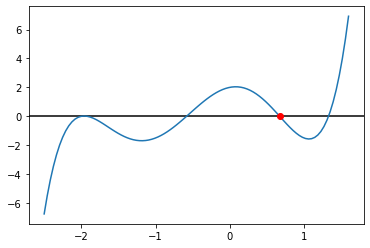

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from numpy.polynomial import Polynomial
aa=[2.0, 1.0, -6.0, -2.0, 2.5, 1.0]
f = Polynomial(aa)
a = -0.5
b = 1.3
m = (a+b)/2
e = 1e-6
list_a = []
list_b = []
list_m = []
list_f = []
  
  


  


  
  
  
while True:
  list_a.append(a)
  list_b.append(b)
  list_m.append(m)
  list_f.append(f(m))
  m=(a+b)/2
  if f(a)*f(m)<0:
    b=m
  elif f(b)*f(m)<0:
    a=m
  if abs((m-((a+b)/2))/m)<=e:
    root=m
    break
a = i
b = i+1
m = (a+b)/2
e = 1e-6
xs = np.linspace(-2.5, 1.6, 100)
ys = f(x)

plt.axhline(y=0, color='k')
plt.plot(xs, ys)
plt.plot(root, f(root), 'ro')

print(pd.DataFrame({'a':list_a, 'b':list_b, 'm':list_m, 'f(x)':list_f}))

### Fixed point iteration

#### Fixed point
A number $\xi$ is called a **fixed point** to function $g(x)$ if $g(\xi) = \xi$. Using fixed points are a nice strategy to find roots of an equation. In this method if we are trying to find a root of $f(x) = 0$, we try to write the function in the form, $x = g(x)$. That is,
$$
f(x) = x - g(x) = 0
$$

So, if $\xi$ is a fixed point of $g(x)$ it would also be a root of $f(x)=0$, because,
$$
f(\xi) = \xi - g(\xi) = \xi - \xi = 0
$$

We can find a suitable $g(x)$ in any number of ways. Not all of them would converge, whereas, Some would converge very fast. For example, consider $Eq. 6.1$.

\begin{align}
&         &    f(x) &=x^5 + 2.5x^4 - 2x^3 -6x^2 + x + 2 \\
&\implies &x - g(x) &=x^5 + 2.5x^4 - 2x^3 -6x^2 + x + 2 \\
&\implies &    g(x) &=-x^5 - 2.5x^4 + 2x^3 + 6x^2 - 2 \tag{6.2}\\
\end{align}

again, 
$$
f(x) = x^5 + 2.5x^4 - 2x^3 -6x^2 + x + 2 = 0\\
$$
\begin{align}
&\implies &6x^2 &= x^5 + 2.5x^4 - 2x^3 + x + 2 \\
&\implies &x^2  &= \frac{1}{6}(x^5 + 2.5x^4 - 2x^3 + x + 2)\\
&\implies &x    &= \sqrt{\frac{1}{6}(x^5 + 2.5x^4 - 2x^3 + x + 2)}\\
&\implies &g(x) &= \sqrt{\frac{1}{6}(x^5 + 2.5x^4 - 2x^3 + x + 2)}\tag{6.3}\\
\end{align}

Similarly,
\begin{align}
&         &2.5x^4 &= -x^5 + 2x^3 + 6x^2 - x - 2 \\
&\implies &x^4  &= \frac{1}{2.5}(-x^5 + 2x^3 + 6x^2 - x - 2)\\
&\implies &x    &= \sqrt[\leftroot{-2}\uproot{2}4]{\frac{1}{2.5}(-x^5 + 2x^3 + 6x^2 - x - 2)}\\
&\implies &g(x) &= \sqrt[\leftroot{-2}\uproot{2}4]{\frac{1}{2.5}(-x^5 + 2x^3 + 6x^2 - x - 2)}\tag{6.4}\\
\end{align}

### B. Complete the code below
For this example we will use a couple of $g(x)$ function to find out which one converges faster.

Empty DataFrame
Columns: [g1(x), g2(x), g3(x))]
Index: []


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in power
  from ipykernel import kernelapp as app


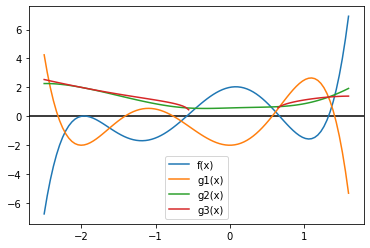

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from numpy.polynomial import Polynomial

f = Polynomial([2.0, 1.0, -6.0, -2.0, 2.5, 1.0])
g1 = Polynomial([-2.0, 0.0, 6.0, 2.0, -2.5, -1.0])

def g2(x):
  p = Polynomial([2.0, 1.0, 0.0, -2.0, 2.5, 1.0])
  return np.sqrt(p(x)/6)

def g3(x):
  p = Polynomial([-2.0, -1.0, 6.0, 2.0, 0.0, -1.0])
  return np.power(p(x)/2.5, 1.0/4.0)

a1 = 0.8
g1_a = []

a2 = 0.8
g2_a = []

a3 = 0.8
g3_a = []

#+----------------------+
#| Start of your code   +
#+----------------------+
for i in range(100):
  a1=(g1(a1))
  g1.append(a1)
  





#+--------------------+
#| End of your code   +
#+--------------------+

xs = np.linspace(-2.5, 1.6, 100)
ys = f(x)
dictionary = {
    'x': xs,
    'y': ys
}
plt.axhline(y=0, color='k')
plt.plot(xs, f(xs), label='f(x)')
plt.plot(xs, g1(xs), label='g1(x)')
plt.plot(xs, g2(xs), label='g2(x)')
plt.plot(xs, g3(xs), label='g3(x)')
plt.legend()
if len(g1_a) > 0:
  root = np.array([g1_a[len(g1_a)-1], g2_a[len(g2_a)-1], g3_a[len(g3_a)-1]])
  plt.plot(root, f(root), 'ro')

print(pd.DataFrame({'g1(x)':g1_a, 'g2(x)':g2_a, 'g3(x))':g3_a,}))

      g1(x)     g2(x)    g3(x))
0  1.512320  0.721997  0.912898
1 -2.347605  0.688573  1.044444
2  0.562201  0.677301  1.160638
3 -0.054108  0.673860  1.241682
4 -1.982772  0.672844  1.288278
5 -1.995936  0.672547  1.311548
6 -1.999770  0.672460  1.322205
7 -1.999999  0.672435  1.326870
8 -2.000000  0.672427  1.328868
9 -2.000000  0.672425  1.329716


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in power
  from ipykernel import kernelapp as app


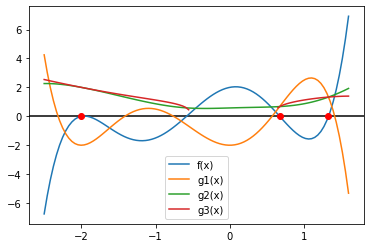

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from numpy.polynomial import Polynomial

f = Polynomial([2.0, 1.0, -6.0, -2.0, 2.5, 1.0])
g1 = Polynomial([-2.0, 0.0, 6.0, 2.0, -2.5, -1.0])

def g2(x):
  p = Polynomial([2.0, 1.0, 0.0, -2.0, 2.5, 1.0])
  return np.sqrt(p(x)/6)

def g3(x):
  p = Polynomial([-2.0, -1.0, 6.0, 2.0, 0.0, -1.0])
  return np.power(p(x)/2.5, 1.0/4.0)

a1 = 0.8
g1_a = []

a2 = 0.8
g2_a = []

a3 = 0.8
g3_a = []

#+----------------------+
#| Start of your code   +
#+----------------------+
for i in range(10):
  a1=(g1(a1))
  g1_a.append(a1)
 
  a2=(g2(a2))
  g2_a.append(a2)
  
  a3=(g3(a3))
  g3_a.append(a3)




#+--------------------+
#| End of your code   +
#+--------------------+

xs = np.linspace(-2.5, 1.6, 100)
ys = f(x)
dictionary = {
    'x': xs,
    'y': ys
}
plt.axhline(y=0, color='k')
plt.plot(xs, f(xs), label='f(x)')
plt.plot(xs, g1(xs), label='g1(x)')
plt.plot(xs, g2(xs), label='g2(x)')
plt.plot(xs, g3(xs), label='g3(x)')
plt.legend()
if len(g1_a) > 0:
  root = np.array([g1_a[len(g1_a)-1], g2_a[len(g2_a)-1], g3_a[len(g3_a)-1]])
  plt.plot(root, f(root), 'ro')

print(pd.DataFrame({'g1(x)':g1_a, 'g2(x)':g2_a, 'g3(x))':g3_a,}))